In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.special import jv
sns.set_theme(style="whitegrid", palette="tab10")

In [2]:
gold_path = os.path.join(os.curdir, "Data_Lake","Gold")
gold_2_path = os.path.join(os.curdir, "Data_Lake","Gold")

In [3]:
gold_file_name = "atletas_gold.csv"
gold_2_file_name = "atletas_medallas_gold.csv"

In [4]:
gold_file_path = os.path.join(gold_path,gold_file_name)
gold_2_file_path = os.path.join(gold_2_path,gold_2_file_name)

In [5]:
gold_atletas_df  = pd.read_csv(gold_file_path)
gold_atletas_medallas_df = pd.read_csv(gold_2_file_path)

In [184]:
atletas_año_sexo_df = gold_atletas_df.groupby(['Year','Sex']).size().unstack(fill_value = 0)
#Agrupo a los atletas por año y sexo, y el unstack es para que el sexo este dividido en columna m y f

In [186]:
atletas_año_sexo_df = atletas_año_sexo_df.drop(columns=['Desconocido'])
#Quito los valores con sexo desconocido

In [187]:
atletas_año_sexo_df['Total'] = atletas_año_sexo_df['M'] + atletas_año_sexo_df['F']

In [190]:
print(atletas_año_sexo_df)

Sex      F     M  Total
Year                   
1964  1348  6354   7702
1968  1777  6811   8588
1972  2193  8111  10304
1976  2172  6469   8641
1980  1756  5435   7191
1984  2447  7007   9454
1988  3543  8494  12037
1992  4124  8852  12976
1996  5008  8772  13780
2000  5431  8390  13821
2004  5546  7897  13443
2008  5816  7786  13602
2012  5815  7105  12920
2016  6223  7464  13687


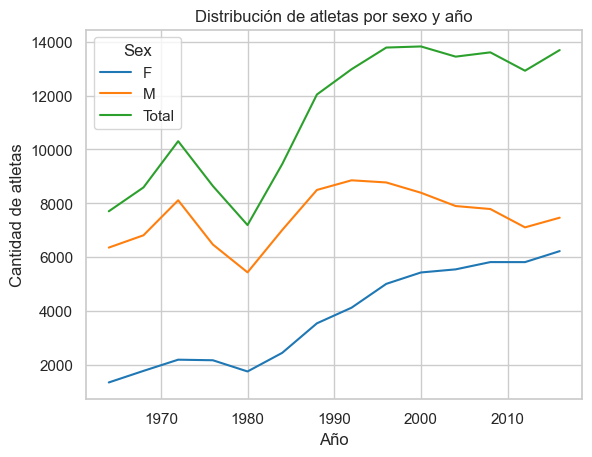

In [192]:
atletas_año_sexo_df.plot()
plt.legend(title = 'Sex')
plt.title('Distribución de atletas por sexo y año')
plt.xlabel('Año')
plt.ylabel('Cantidad de atletas')
plt.show()
#Dibujo la comparativo de atletas hombres y mujeres a lo largo de los años

In [193]:
print(gold_atletas_medallas_df)

      Year      Country  Bronze  Gold  Silver  Participantes  Total_Medallas
0     1964  Afghanistan       0     0       0              8               0
1     1964      Algeria       0     0       0              7               0
2     1964    Argentina       0     0       1            148               1
3     1964    Australia      30     8       6            392              44
4     1964      Austria       0     0       0             82               0
...    ...          ...     ...   ...     ...            ...             ...
2175  2016    Venezuela       2     0       1            105               3
2176  2016      Vietnam       0     1       1             28               2
2177  2016        Yemen       0     0       0              3               0
2178  2016       Zambia       0     0       0              7               0
2179  2016     Zimbabwe       0     0       0             31               0

[2180 rows x 7 columns]


In [194]:
total_medallas_por_pais_df = gold_atletas_medallas_df.groupby('Country').sum().reset_index()
#El reset index es para que el pais sea una columna

In [195]:
print(total_medallas_por_pais_df)

            Country   Year  Bronze  Gold  Silver  Participantes  \
0       Afghanistan  19908       2     0       0             57   
1           Albania  16000       0     0       0             63   
2           Algeria  25884       8     5       4            539   
3    American Samoa  16016       0     0       0             35   
4           Andorra  21956       0     0       0             53   
..              ...    ...     ...   ...     ...            ...   
214    West Germany   9888     188   144     172           2558   
215           Yemen  14028       0     0       0             32   
216      Yugoslavia  13832      82   107      99           1077   
217          Zambia  25884       1     0       1            183   
218        Zimbabwe  21944       1    17       4            297   

     Total_Medallas  
0                 2  
1                 0  
2                17  
3                 0  
4                 0  
..              ...  
214             504  
215               0

In [ ]:
top10_paises_medallas = total_medallas_por_pais_df.sort_values(by='Total_Medallas', ascending = False).head(10)
top10_paises_gold = total_medallas_por_pais_df.sort_values(by='Gold', ascending = False).head(10)
top10_paises_silver = total_medallas_por_pais_df.sort_values(by='Silver', ascending = False).head(10)
top10_paises_bronze = total_medallas_por_pais_df.sort_values(by='Bronze', ascending = False).head(10)
#Calculo top 10 paises con mas medallas, mas oros, mas platas y mas bronces

In [17]:
print(top10_paises_medallas)

            Country   Year  Bronze  Gold  Silver  Participantes  \
207   United States  25880     711  1512     823           8795   
183    Soviet Union  11848     477   667     464           3346   
10        Australia  27860     443   282     387           5953   
73          Germany  15992     414   353     290           4520   
40            China  18000     258   334     317           4222   
159          Russia  12036     322   295     271           3302   
58     East Germany   9884     227   339     277           2104   
206  United Kingdom  27860     288   255     276           5984   
94            Italy  27860     274   196     266           5188   
96            Japan  25880     298   195     223           5052   

     Total_Medallas  
207            3046  
183            1608  
10             1112  
73             1057  
40              909  
159             888  
58              843  
206             819  
94              736  
96              716  


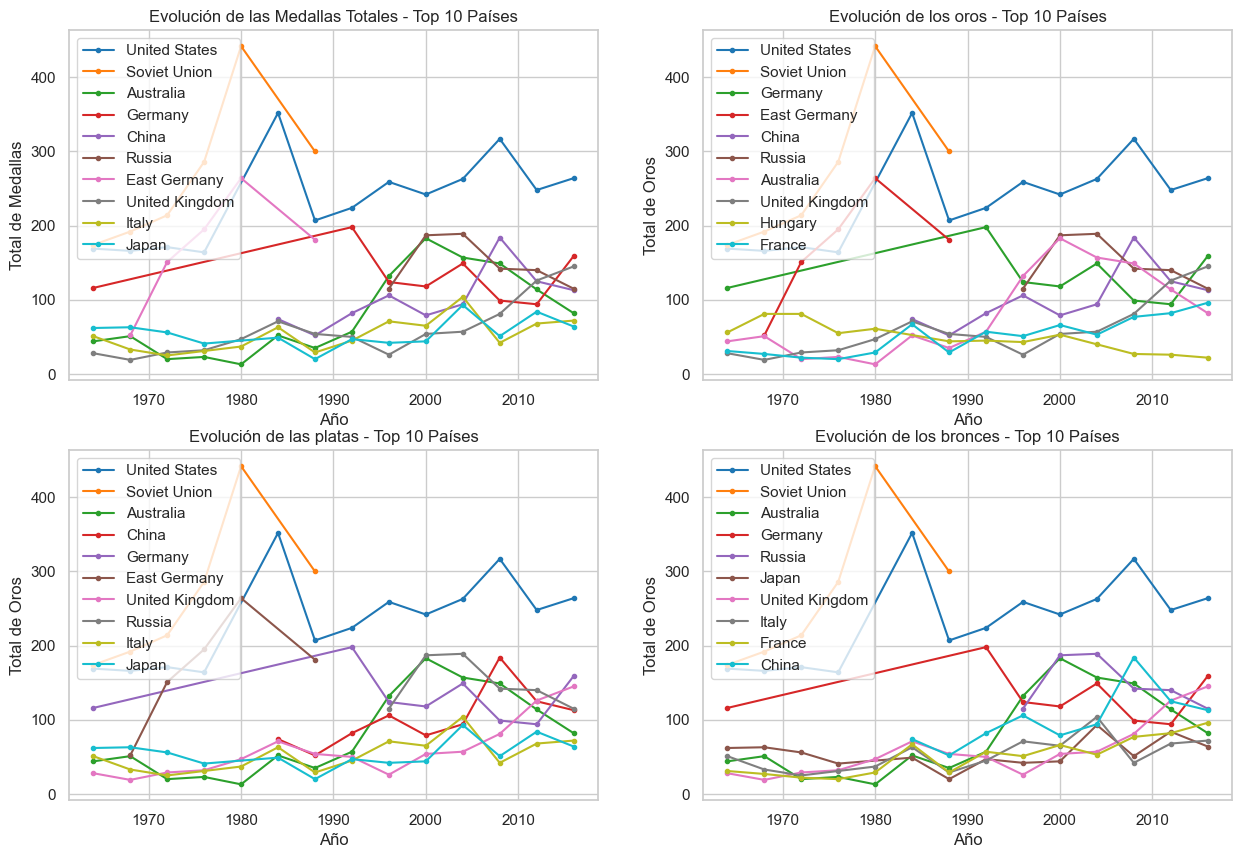

In [196]:
fig,axes = plt.subplots(2,2,figsize = (15,10))
#Hago un bucle for ya que solo quiero que me represente los paises que se encuentren el top 10
for country in top10_paises_medallas['Country']:
    paises_top10 = gold_atletas_medallas_df[gold_atletas_medallas_df['Country'] == country]
    axes[0,0].plot(paises_top10['Year'],paises_top10['Total_Medallas'],label = country,marker = 'o', markersize = 3)
axes[0,0].set_title('Evolución de las Medallas Totales - Top 10 Países')
axes[0,0].set_xlabel('Año')
axes[0,0].set_ylabel('Total de Medallas')
axes[0,0].legend(loc='upper left')

for country in top10_paises_gold['Country']:
    oro_top10 = gold_atletas_medallas_df[gold_atletas_medallas_df['Country'] == country]
    axes[0,1].plot(oro_top10['Year'],oro_top10['Total_Medallas'],label = country,marker = 'o', markersize = 3)
axes[0,1].set_title('Evolución de los oros - Top 10 Países')
axes[0,1].set_xlabel('Año')
axes[0,1].set_ylabel('Total de Oros')
axes[0,1].legend(loc='upper left')

for country in top10_paises_silver['Country']:
    plata_top10 = gold_atletas_medallas_df[gold_atletas_medallas_df['Country'] == country]
    axes[1,0].plot(plata_top10['Year'],plata_top10['Total_Medallas'],label = country,marker = 'o', markersize = 3)
axes[1,0].set_title('Evolución de las platas - Top 10 Países')
axes[1,0].set_xlabel('Año')
axes[1,0].set_ylabel('Total de Oros')
axes[1,0].legend(loc='upper left')

for country in top10_paises_bronze['Country']:
    bronce_top10 = gold_atletas_medallas_df[gold_atletas_medallas_df['Country'] == country]
    axes[1,1].plot(bronce_top10['Year'],bronce_top10['Total_Medallas'],label = country,marker = 'o', markersize = 3)
axes[1,1].set_title('Evolución de los bronces - Top 10 Países')
axes[1,1].set_xlabel('Año')
axes[1,1].set_ylabel('Total de Oros')
axes[1,1].legend(loc='upper left')
plt.show()

In [ ]:
top10_paises_participantes = total_medallas_por_pais_df.sort_values(by='Participantes', ascending = False).head(10)
#Saco los 10 paises con mas participantes

In [20]:
print(top10_paises_participantes)

            Country   Year  Bronze  Gold  Silver  Participantes  \
207   United States  25880     711  1512     823           8795   
206  United Kingdom  27860     288   255     276           5984   
10        Australia  27860     443   282     387           5953   
69           France  27860     270   218     219           5406   
34           Canada  25880     230    86     144           5309   
94            Italy  27860     274   196     266           5188   
96            Japan  25880     298   195     223           5052   
73          Germany  15992     414   353     290           4520   
40            China  18000     258   334     317           4222   
184           Spain  27860     120   104     216           4143   

     Total_Medallas  
207            3046  
206             819  
10             1112  
69              707  
34              460  
94              736  
96              716  
73             1057  
40              909  
184             440  


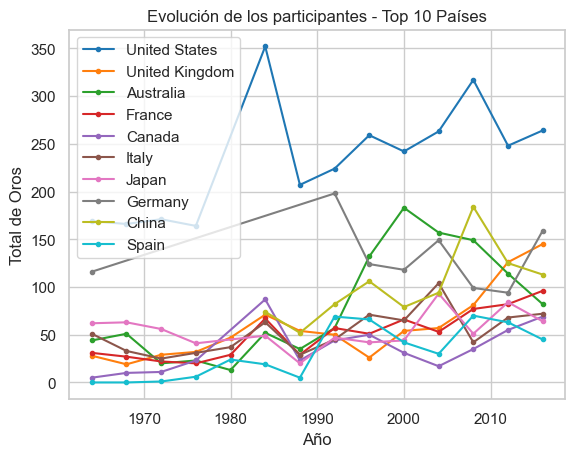

In [ ]:
#Los dibujo
for country in top10_paises_participantes['Country']:
    subset = gold_atletas_medallas_df[gold_atletas_medallas_df['Country'] == country]
    plt.plot(subset['Year'],subset['Total_Medallas'],label = country,marker = 'o', markersize = 3)
plt.title('Evolución de los participantes - Top 10 Países')
plt.xlabel('Año')
plt.ylabel('Total de Oros')
plt.legend(loc='upper left')
plt.show()

In [22]:
gold_atletas_df.head()

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,_BronzeTimestamp,Country
0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,2025-11-06 16:43:18.047773,China
1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,2025-11-06 16:43:18.047773,China
2,12,Jyri Tapani Aalto,M,31.0,172.0,70.0,FIN,2000 Summer,2000,Summer,Sydney,Badminton,Badminton Men's Singles,NaN,2025-11-06 16:43:18.047773,Finland
3,13,Minna Maarit Aalto,F,30.0,159.0,55.5,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,NaN,2025-11-06 16:43:18.047773,Finland
4,13,Minna Maarit Aalto,F,34.0,159.0,55.5,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,NaN,2025-11-06 16:43:18.047773,Finland


In [23]:
atletas_españa_df = gold_atletas_df

In [ ]:
atletas_españa_df = atletas_españa_df[atletas_españa_df['Country'] == 'Spain']
#Me quedo solo con los atletas españoles

In [ ]:
#Dibujo en 3d todos los atletas españoles con medalla, con eje x la edad, eje y la altura y eje z el peso. Ademas cada color representa la medalla, y si te situas encima te dice en que deporte
fig = px.scatter_3d(atletas_españa_df,
                    x='Age',
                    y='Height',
                    z='Weight',
                    color='Medal',
                    color_discrete_map={
                    "Gold": "#FFD700",
                    "Silver": "#C0C0C0",
                    "Bronze": "#CD7F32"},
                    hover_data=['Sport'],
                    opacity=0.7,
                    size_max = 0.5
)
fig.update_layout(
    scene=dict(
        xaxis_title = 'Edad del atleta',
        yaxis_title = 'Altura del atleta',
        zaxis_title = 'Peso del atleta'
    ),
    legend_title = 'Medalla',
    scene_aspectmode='cube'
)
fig.update_traces(marker=dict(size=5))

In [ ]:
correlacion_altura_peso = gold_atletas_df[['Height','Weight']].corr(method = 'spearman')
print("Correlación de Pearson entre altura y peso: ")
print(correlacion_altura_peso)
#Saco la correlacion entre altura y peso, y veo que hay correlacion como es de esperar

Correlación de Pearson entre altura y peso: 
          Height    Weight
Height  1.000000  0.833486
Weight  0.833486  1.000000


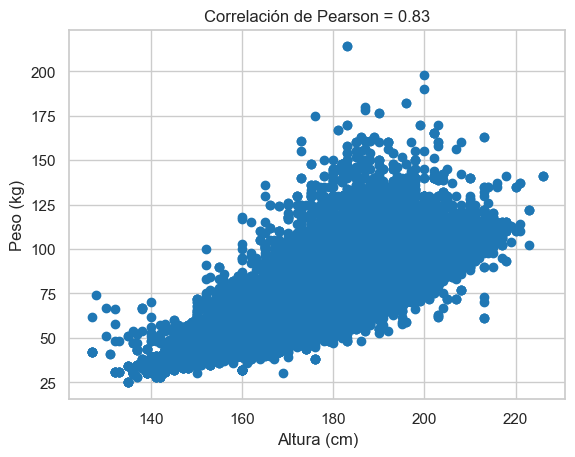

In [ ]:
#Represento esta correlacion
plt.scatter(gold_atletas_df['Height'],gold_atletas_df['Weight'])
plt.xlabel('Altura (cm)')
plt.ylabel('Peso (kg)')
plt.title(f'Correlación de Pearson = {round(gold_atletas_df['Height'].corr(gold_atletas_df['Weight'],method='spearman'),2)}')
plt.show()

In [ ]:
atletas_baloncesto_df = gold_atletas_df[gold_atletas_df['Sport'] == 'Basketball']
#Me quedo solo con los atletas de baloncesto

In [ ]:
correlacion_altura_peso_baloncesto = atletas_baloncesto_df[['Height','Weight']].corr(method = 'spearman')
print("Correlación de Pearson entre altura y peso: ")
print(correlacion_altura_peso_baloncesto)
#Veo que hay mas correlacion incluso cuando solo tenemos en cuenta a los atletas de baloncesto

Correlación de Pearson entre altura y peso: 
          Height    Weight
Height  1.000000  0.889732
Weight  0.889732  1.000000


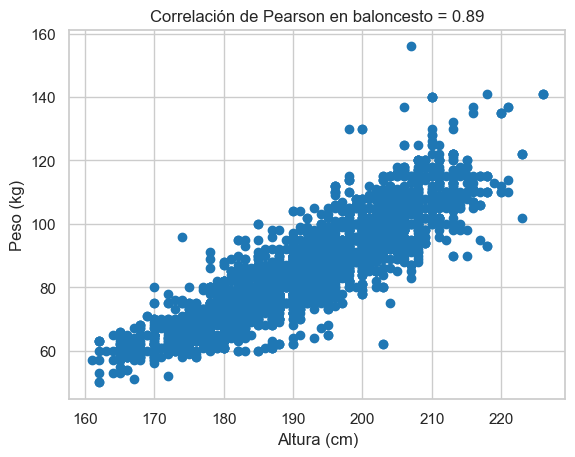

In [ ]:
#Lo dibujo
plt.scatter(atletas_baloncesto_df['Height'],atletas_baloncesto_df['Weight'])
plt.xlabel('Altura (cm)')
plt.ylabel('Peso (kg)')
plt.title(f'Correlación de Pearson en baloncesto = {round(atletas_baloncesto_df['Height'].corr(atletas_baloncesto_df['Weight'],method='spearman'),2)}')
plt.show()

In [ ]:
atletas_natacion_df = gold_atletas_df[gold_atletas_df['Sport'] == 'Swimming']
#Hago lo mismo con los de natación

In [ ]:
correlacion_altura_peso_natacion = atletas_natacion_df[['Height','Weight']].corr(method = 'spearman')
print("Correlación de Pearson entre altura y peso en natación: ")
print(correlacion_altura_peso_natacion)
#Veo que hay una buena correlacion también

Correlación de Pearson entre altura y peso en natación: 
          Height    Weight
Height  1.000000  0.880307
Weight  0.880307  1.000000


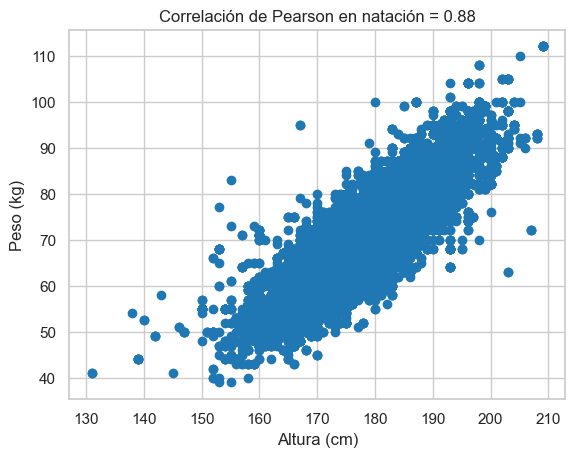

In [94]:
plt.scatter(atletas_natacion_df['Height'],atletas_natacion_df['Weight'])
plt.xlabel('Altura (cm)')
plt.ylabel('Peso (kg)')
plt.title(f'Correlación de Pearson en natación = {round(atletas_natacion_df['Height'].corr(atletas_natacion_df['Weight'],method='spearman'),2)}')
plt.show()

In [ ]:
altura_hombres_baloncesto_df = gold_atletas_df[(gold_atletas_df['Sex']=='M') & (gold_atletas_df['Sport']=='Basketball')]['Height'].dropna()
altura_mujeres_baloncesto_df = gold_atletas_df[(gold_atletas_df['Sex']=='F') & (gold_atletas_df['Sport']=='Basketball')]['Height'].dropna()
#Diferencio entre los jugadores masculino y femenino de baloncesto, y no me quedo con los valores nulos

In [140]:
from scipy.stats import ttest_ind

In [ ]:
t_stat, p_value = ttest_ind(altura_hombres_baloncesto_df,altura_mujeres_baloncesto_df)
print(p_value,t_stat)
#p_value practicamente 0, t_stat = 42.28, asi que como era de esperar hay una diferencia significativa y la altura de los hombres es mucho mayor

6.5769580815e-314 42.27817022957517


In [ ]:
atletas_altura_filtrado_df = gold_atletas_df[(gold_atletas_df['Height'].notna()) & (gold_atletas_df['Sex']!= 'Desconocido') & (gold_atletas_df['Sport'] == 'Basketball') ]
#Me quedo con todos los jugadores de baloncesto cuya altura no es nula

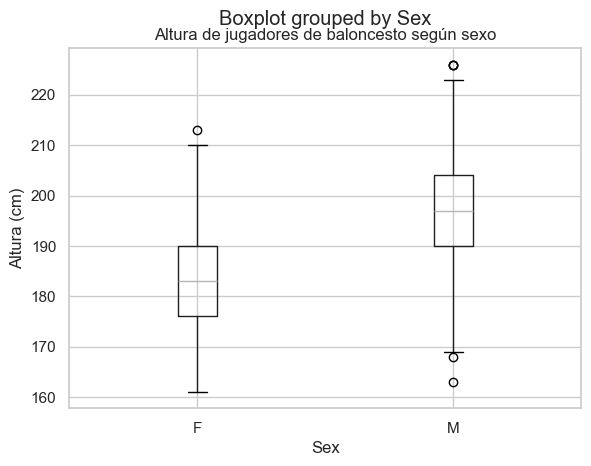

In [ ]:
atletas_altura_filtrado_df.boxplot(column = 'Height', by= 'Sex')
plt.title('Altura de jugadores de baloncesto según sexo')
plt.ylabel('Altura (cm)')
plt.show()
#Vemos la diferencia significativa y como hay mas altura en los hombres (lo esperado)

In [ ]:
edad_hombres_baloncesto_df = gold_atletas_df[(gold_atletas_df['Sex']=='M') & (gold_atletas_df['Sport']=='Basketball')]['Age'].dropna()
edad_mujeres_baloncesto_df = gold_atletas_df[(gold_atletas_df['Sex']=='F') & (gold_atletas_df['Sport']=='Basketball')]['Age'].dropna()
#Vamos a ver lo mismo con la edad

In [ ]:
t_stat, p_value = ttest_ind(edad_hombres_baloncesto_df,edad_mujeres_baloncesto_df)
print(p_value,t_stat)
#p_value = 0.15, t_stat = 1.41, asi que aqui no hay diferencia significativa 

0.15745196785154508 1.4140062770202255


In [151]:
atletas_edad_filtrado_df = gold_atletas_df[(gold_atletas_df['Age'].notna()) & (gold_atletas_df['Sex']!='Desconocido') & (gold_atletas_df['Sport']=='Basketball')]

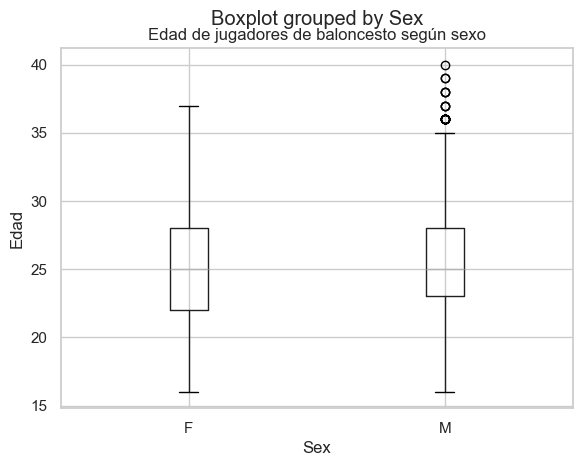

In [ ]:
atletas_edad_filtrado_df.boxplot(column = 'Age', by= 'Sex')
plt.title('Edad de jugadores de baloncesto según sexo')
plt.ylabel('Edad')
plt.show()
#Se puede ver como no hay diferencia significativa con la edad

In [164]:
atletas_con_medalla_df = gold_atletas_df

In [165]:
atletas_con_medalla_df['Tiene_Medalla'] = atletas_con_medalla_df['Medal'].notna().astype(int)
#Creo una nueva columna que si tiene medalla es un 1 y si no tiene es un 0

In [ ]:
#Correlacion entre edad y medallas
correlacion_edad_medallas = atletas_con_medalla_df[['Tiene_Medalla','Age']].corr(method = 'spearman')
print(correlacion_edad_medallas)
#Vemos que no hay correlacion

               Tiene_Medalla       Age
Tiene_Medalla       1.000000  0.042797
Age                 0.042797  1.000000


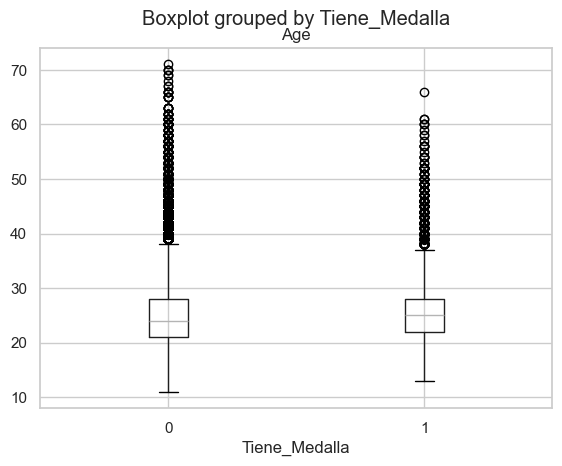

In [ ]:
atletas_con_medalla_df.boxplot(column = 'Age', by='Tiene_Medalla')
plt.show()
#Lo esperado segun el coeficiente de correlacion que nos habia dado antes